# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import NaN, NAN, nan
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
dfreg=pd.read_csv('housing.csv')

In [3]:
dfreg.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dfreg.shape

(20640, 10)

In [6]:
dfreg.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
dfreg.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
dfreg.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
dfreg.duplicated().sum()

0

**CLEANING AND MODIFYING THE DATASET**

In [10]:
dfreg.dropna(inplace = True)

In [11]:
dfreg.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
dfreg['ocean_proximity'] = dfreg['ocean_proximity'].convert_dtypes()

In [13]:
dfreg.dtypes

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity       string[python]
dtype: object

In [14]:
dfreg = pd.concat([dfreg,pd.get_dummies(dfreg['ocean_proximity'])],axis =1)
dfreg.drop('ocean_proximity',axis =1,inplace=True)

**VISUALIZING THE DATASET**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

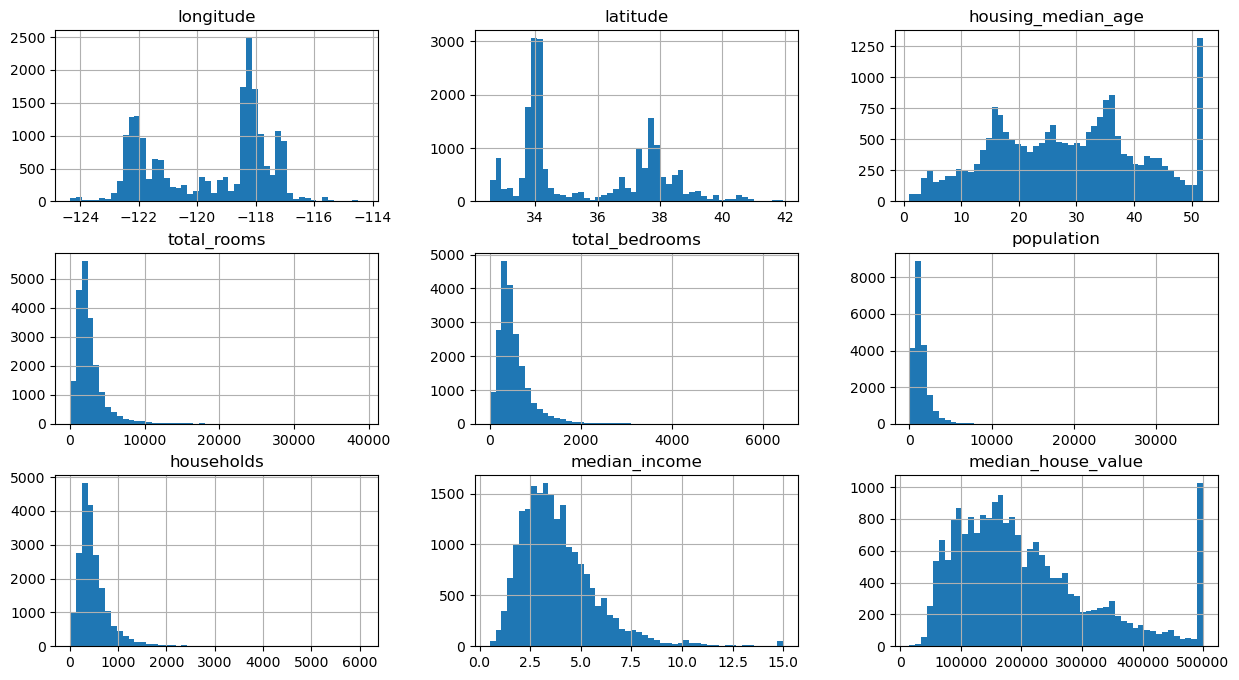

In [15]:
dfreg.hist(figsize=(15, 8),bins = 50)

<Axes: >

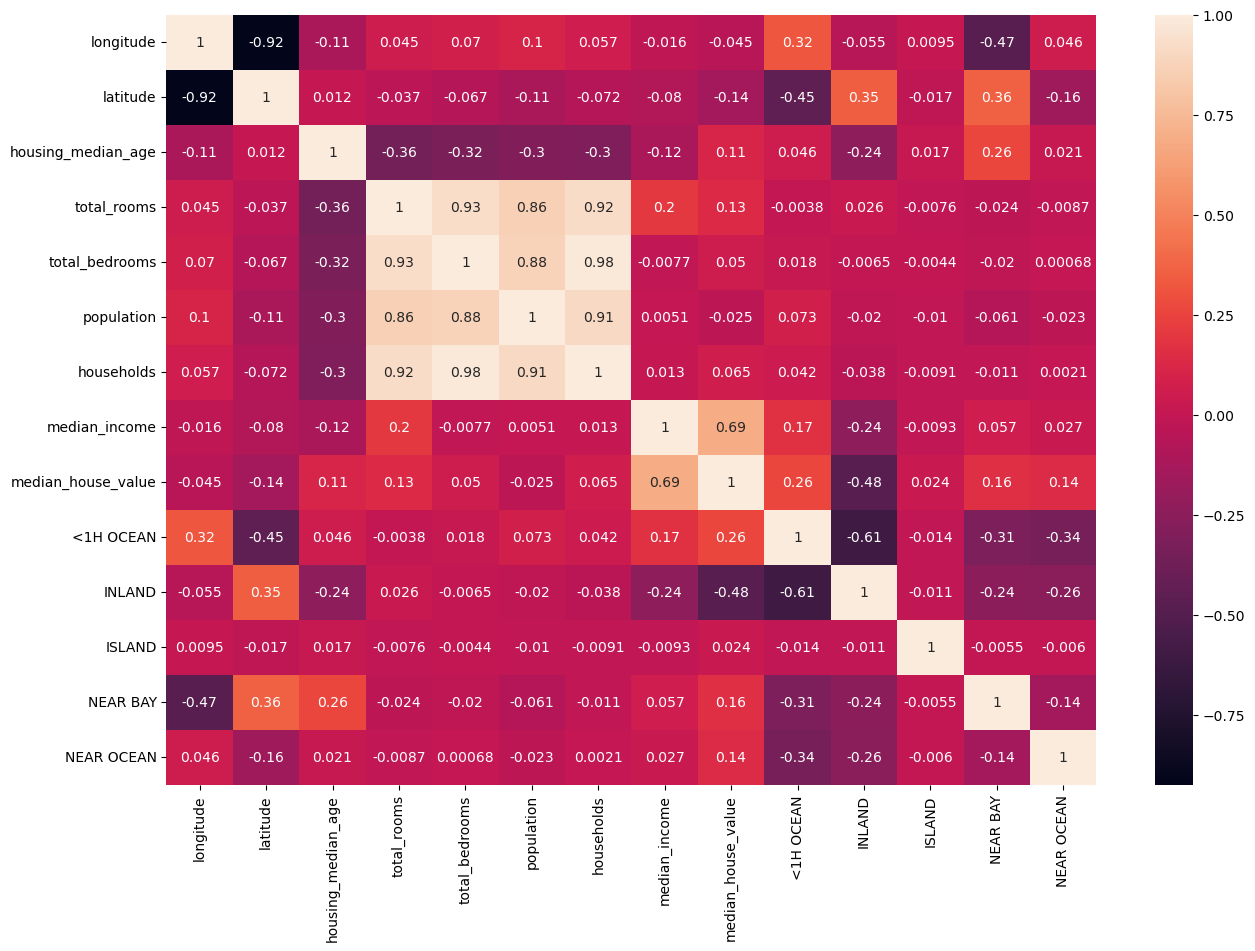

In [16]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(dfreg.corr(),annot =True)

# Model Implementation


In [17]:
x = dfreg[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = dfreg['median_house_value']

In [18]:
X_trainreg, X_testreg, y_trainreg, y_testreg = train_test_split(x, y, test_size=0.3)

In [19]:
print(f'Shape of the X_train: {X_trainreg.shape}')
print(f'Shape of the X_test: {X_testreg.shape}')
print(f'Shape of the y_train: {y_trainreg.shape}')
print(f'Shape of the y_test: {y_testreg.shape}')

Shape of the X_train: (14303, 8)
Shape of the X_test: (6130, 8)
Shape of the y_train: (14303,)
Shape of the y_test: (6130,)


In [20]:
# Linear Regression
reg_lr=LinearRegression()
reg_lr.fit(x,y)

LinearRegression()

# Model Evaluation

In [21]:
y_pred = reg_lr.predict(X_testreg)
mae = mean_absolute_error(y_testreg, y_pred)
mape = mean_absolute_percentage_error(y_testreg,y_pred)
mse = mean_squared_error(y_testreg,y_pred)
r2 = r2_score(y_testreg, y_pred)


print("Mean Absolute Error:",round(mae,2))
print("Mean Absolute Percentage Error:",round(mape,2))
print("Mean Squared Error:" ,round(mse,2))
print("R-squared:",round(r2,2))

Mean Absolute Error: 51019.51
Mean Absolute Percentage Error: 0.31
Mean Squared Error: 4898844163.2
R-squared: 0.63


In [22]:
reg_lr.predict(X_testreg)

array([278326.9571553 , 188407.13211543, 152458.16634426, ...,
       267340.53830449, 214010.98790072, 148377.92127167])

In [23]:
print("Training Accuracy :", reg_lr.score(X_trainreg, y_trainreg ))
print("Testing Accuracy :", reg_lr.score(X_testreg, y_testreg))

Training Accuracy : 0.6383392769300102
Testing Accuracy : 0.6335746360320854


# Resaults Interpretation

In [24]:
scaler_reg=StandardScaler()
X_train_s = scaler_reg.fit_transform(X_trainreg)
reg_lr.fit(X_train_s, y_trainreg)
X_test_s = scaler_reg.transform(X_testreg)
y_pr=reg_lr.predict(X_test_s)

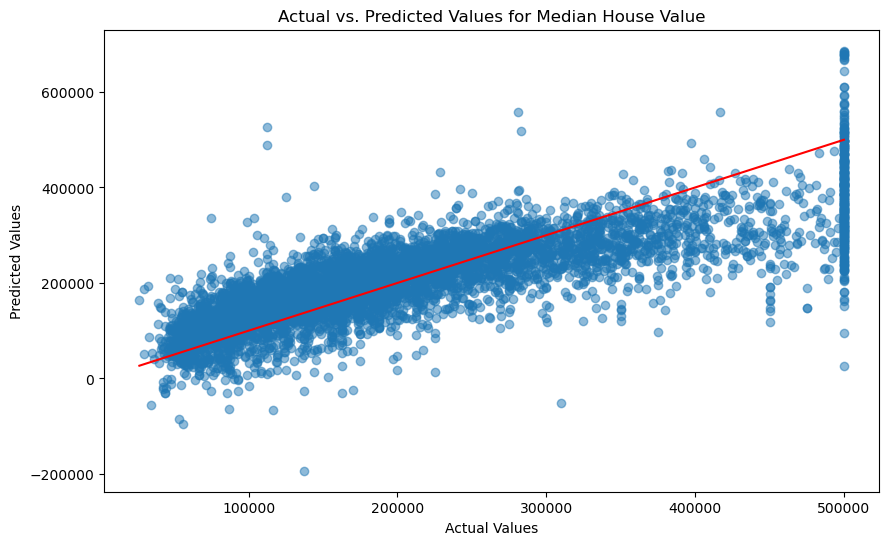

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_testreg, y_pr, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value')
plt.plot([min(y_testreg), max(y_testreg)], [min(y_testreg), max(y_testreg)], color='red') 
plt.show()